# Embedding Models - Cosine Similarity

`text-embedding-ada-002` used to give high cosine similarity between texts. I used to consider 85% a reasonable threshold for similarity. I almost never got a similarity less than 50%.

`text-embedding-3-small` and `text-embedding-3-large` give much lower cosine similarities between texts.

Here's a comparison.

In [14]:
# Take 5 random words
docs = ["apple", "orange", "Facebook", "Jamaica", "Australia"]

# Pick the models we want to compare
models = ("text-embedding-ada-002", "text-embedding-3-small", "text-embedding-3-large")

In [5]:
# Get the embeddings across the models
import numpy as np
import openai

result = {
    model: np.array([item.embedding for item in openai.embeddings.create(model=model, input=docs).data])
    for model in models
}

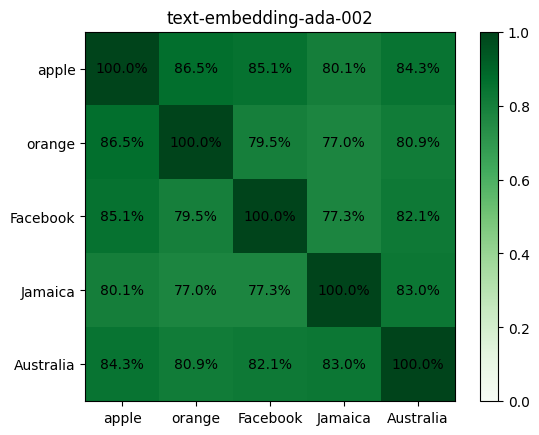

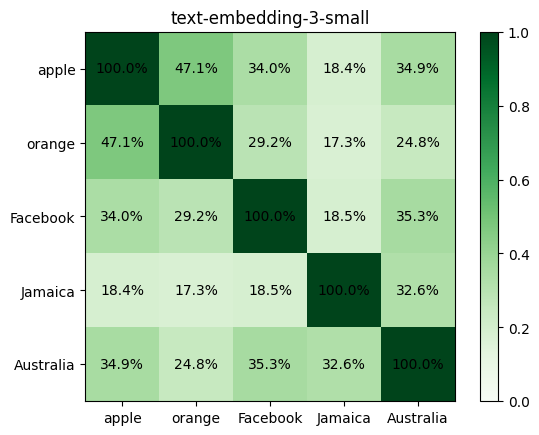

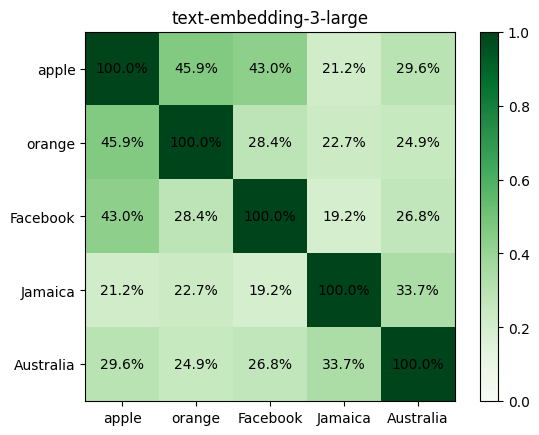

In [22]:
# Let's plot the similarity matrix for each model
import matplotlib.pyplot as plt

for model in models:
  plt.title(model)
  plt.imshow(np.dot(result[model], result[model].T), cmap='Greens', interpolation='nearest', vmin=0, vmax=1)

  # Add percentage labels to each cell
  for i in range(len(docs)):
    for j in range(len(docs)):
      plt.text(j, i, f'{np.dot(result[model], result[model].T)[i, j]:.1%}', ha='center', va='center')

  plt.xticks(range(len(docs)), docs)
  plt.yticks(range(len(docs)), docs)
  plt.colorbar()
  plt.show()

In [21]:
# Let's get the average similarity values for each
import matplotlib.pyplot as plt

{model: np.dot(result[model], result[model].T).mean() for model in models}


{'text-embedding-ada-002': 0.8526012507424493,
 'text-embedding-3-small': 0.4338409176440313,
 'text-embedding-3-large': 0.43625044763207943}

For our words, new `text-embedding-3-*` models have an average similarity of ~43% while the older `text-embedding-ada-002` model had ~85%.

Now, I would treat 45% as a reasonable threshold for similarity. "apple" and "orange" have a similarity of about that much.